In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

In [5]:
# Here, we define some colours
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

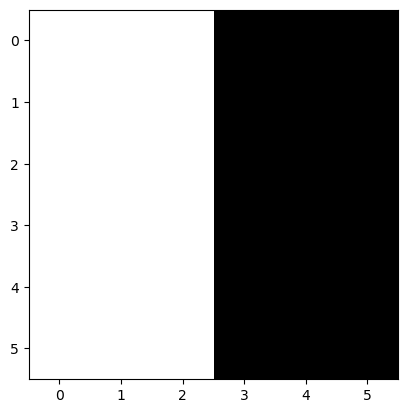

In [9]:
# image
image = np.array([[20,20,20,10,10,10], [20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10],[20,20,20,10,10,10]],dtype=np.float32)
plt.imshow(image, cmap= 'gray')
plt.show()

In [11]:
#defining the kernel
kernel = np.array([[1,0,-1], [1,0,-1],[1,0,-1]],dtype=np.float32) 
kernel

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]], dtype=float32)

[[ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]
 [ 0.  0. 30. 30.  0.  0.]]


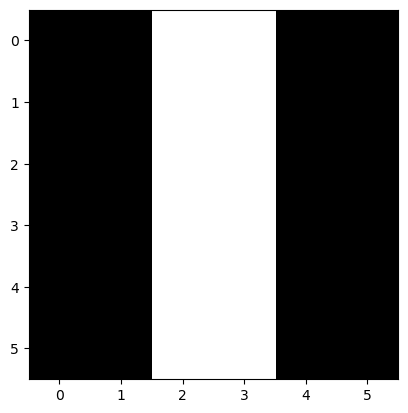

In [15]:
# The output we get after convolving image with filter
output = cv2.filter2D(image,-1,kernel)
print(output)
plt.imshow(output, cmap = 'gray')
plt.show()

### Edge detection example
Let's see one more example edge detection, that is 'canny' edge detection. It is an inbuilt funtion in OpenCV. You can read more it at https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

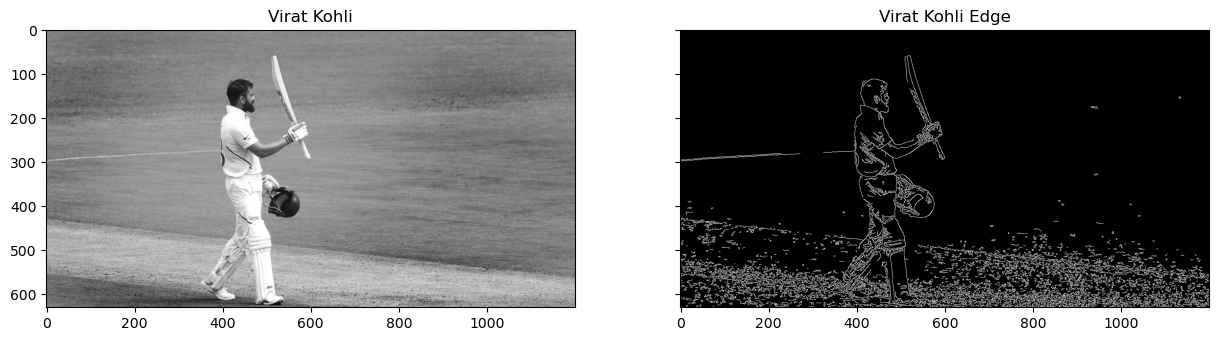

In [22]:
img = cv2.imread('virat.jpg',0)
edges = cv2.Canny(img,100,200) # Canny is a more sophisticated function to get the edges in an image
plot_image([img, edges], cmap='gray', captions = ["Virat Kohli", "Virat Kohli Edge"])
plt.show()

### Optical Character Recognition(OCR)
Here, you will see the process of extracting text from image. You will use OpenCV to preprocess the image and use open-source tesseract library to extract text from pre-processed image

In [29]:
# import the tesseract library
import pytesseract

In [33]:
import matplotlib as mpl

def plotting(image, cmap = None):
    if cmap == 'gray':
        height, width = image.shape
    else:      
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape
        
    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)

    # Display the image.
    plt.imshow(image, cmap)
    plt.show()

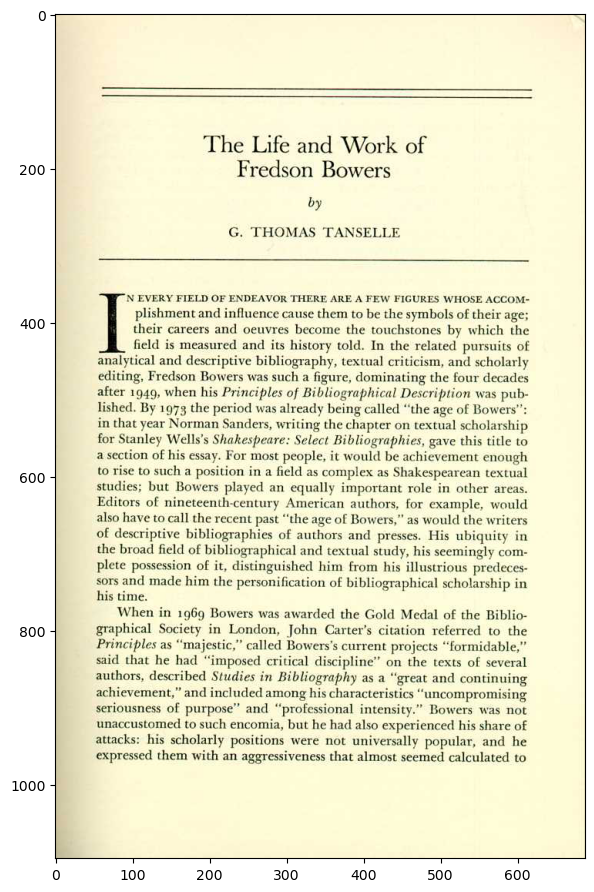

In [37]:
# Reading image and converting it into RGB
image = cv2.imread('ocr.jpg')

plotting(image)

### Extracting text using OCR

text = pytesseract.image_to_string(image)
print(text)

### Pytesseract obtains the text from an image , however, it is better to preprocess it in case of difficulties before extracting the image via pytesseract
### If we run pytesseract on any image, the results wont be always satisfactory, although it is in the example shown above

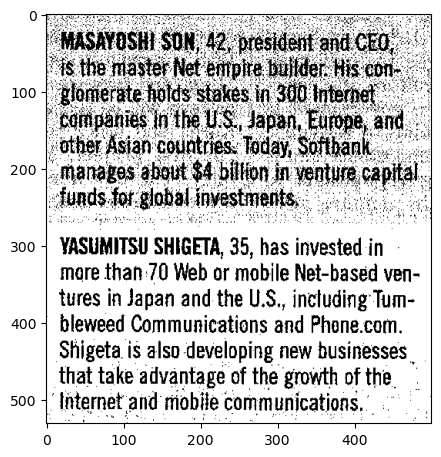

In [46]:
# Reading image and converting it into RGB
image2 = cv2.imread('ocr_tough.png')

plotting(image2)

In [48]:
text2 = pytesseract.image_to_string(image2)
print(text2)

ages shout
a funds, for. global Anvest ments,

YASUMITSU SHIGETA, 35, has invested in
mare than:70 Web or mobile Net-baséd ven-
tures in Japan andthe U.S., including Tum-
bleweed Communications and Phone.com.
Shigeta is also developing new businesses
that take advantage of the growth of the.

: internet, and mtiobile communications,”



### In the above image example, direct usage of pytesseract does not give good outputs

#### -------------------------------------------------------------------------------------------------------------------------------------------

### Pre-processing techniques
You can improve the result by some of the following pre-processing techniques:

1. Increasing resolution: Increase the resolution of image
2. Deskewing: Deskew the image. It also makes it easier to do more processing.
3. Blurring: It is useful for removing noise.
4. Convert to Black and White: Convert the image into black and white after deskewing and resizing. It will produce consistent character size and thickness.
5. Remove Noise: Remove noise from black and white image. Perform operations like morphological transformation, contours etc. to remove the noise.
6. Train Tesseract on the Fon

#### Converting to grayscale
Generally, we convert any colour image to grayscale for better and faster perprocessing.

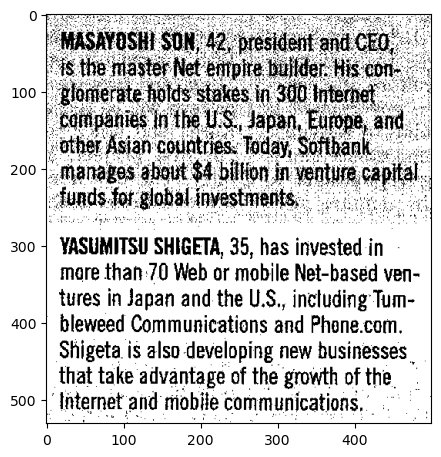

In [57]:
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plotting(gray, cmap = 'gray')

#### Smoothening using blur
There is no need to do descrewing as the fonts are almost straight. The resolution of the image is also good.

1. Gaussian Noise: Gaussian Noise is modeled by adding random values to an image. Gaussian filter helps in removing Gaussian noise from the image.

2. Salt and Pepper Noise: An image containing salt-and-pepper noise will have dark pixels in bright regions and bright pixels in dark regions. Median Filter helps in removing salt-and-pepper noise.

##### Gaussian Blur

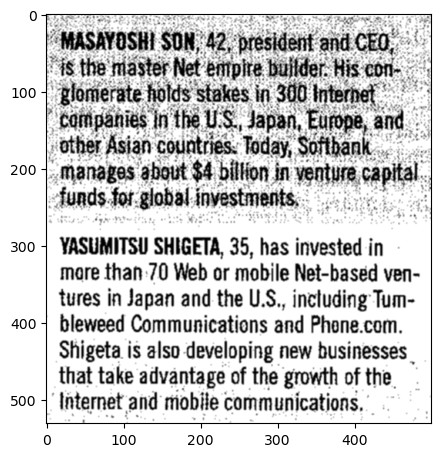

In [61]:
# Add some Gaussian Blur
gaussian = cv2.GaussianBlur(gray,(3,3),0)

#plotting
plotting(gaussian, cmap = 'gray')

##### Median Blur

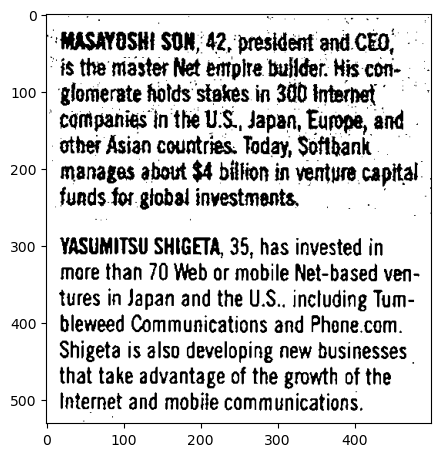

In [65]:
# Median Blur
median = cv2.medianBlur(gray,3)

#plotting
plotting(median, cmap = 'gray')

#### Let us find the text output of pytesseract after blurring

In [67]:
text = pytesseract.image_to_string(median)

print(text)

“ MASAYOSHI SON 42, president and.CEO, -

"4s the master Net entplre builder: His con- .
‘glonierate hotds stakes. in 300 internet

' coripanias in the U:S., Japan, Europe, and -
other Asian countries. Today, Soffhank
manages about $4 billion in venture capital
funds for giobal investments, .

YASUMITSU SHIGETA, 35, has invested in
mare than 70 Web or mobile Net-based ven-
tures in Japan and the U.S.. including Tum-
bleweed Communications and Phone.com.
Shigeta is also developing new businesses
that take advantage of the growth of the
Internet and mobile communications.



### Now we are getting comparatively better output text

### Thresholding the image
The image after smoothing gets blurred. Generally, for OCR to work better, we want sharp borders between characters with high contrast. Binarization makes the image sharp. Also, it reduces the size of the image, which helps in preprocessing in OCR. Let's see some thresholding techniques:

1. Simple Thresholding
2. Adaptive Thresholding
3. Otsu’s Binarization

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

#### Simple Thresholding

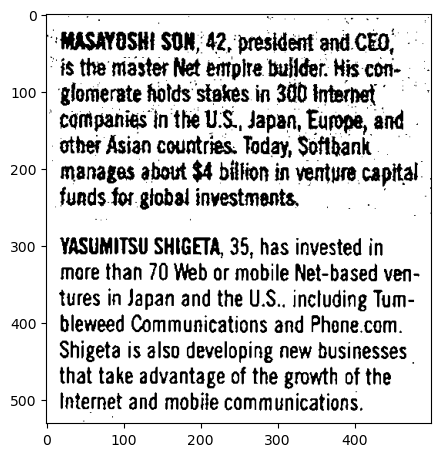

In [75]:
ret, simple_threshold = cv2.threshold(median,127,255,cv2.THRESH_BINARY)
plotting(simple_threshold, cmap = 'gray')

#### Adaptive Thresholding

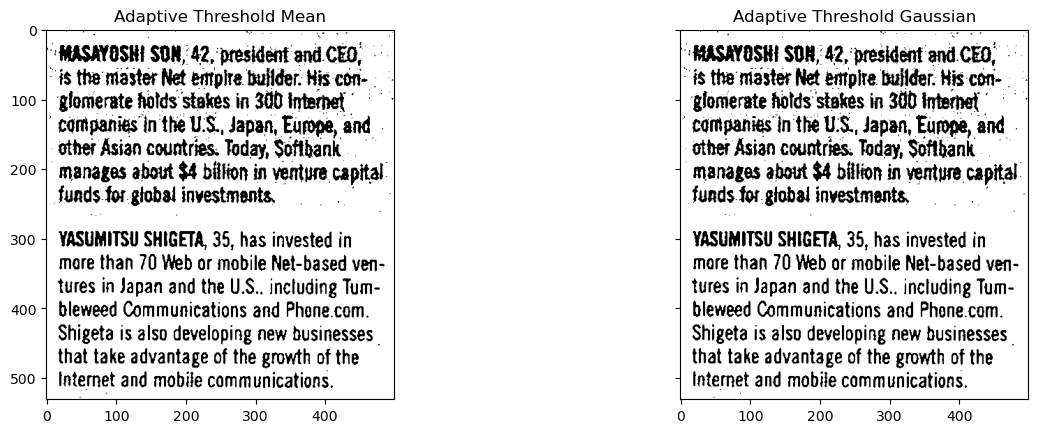

In [83]:
adaptive_threshold_mean = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
adaptive_threshold_gaussian = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plot_image([adaptive_threshold_mean, adaptive_threshold_gaussian], cmap='gray', captions = ["Adaptive Threshold Mean", "Adaptive Threshold Gaussian"])
plt.show()

#### Otsu' Thresholding

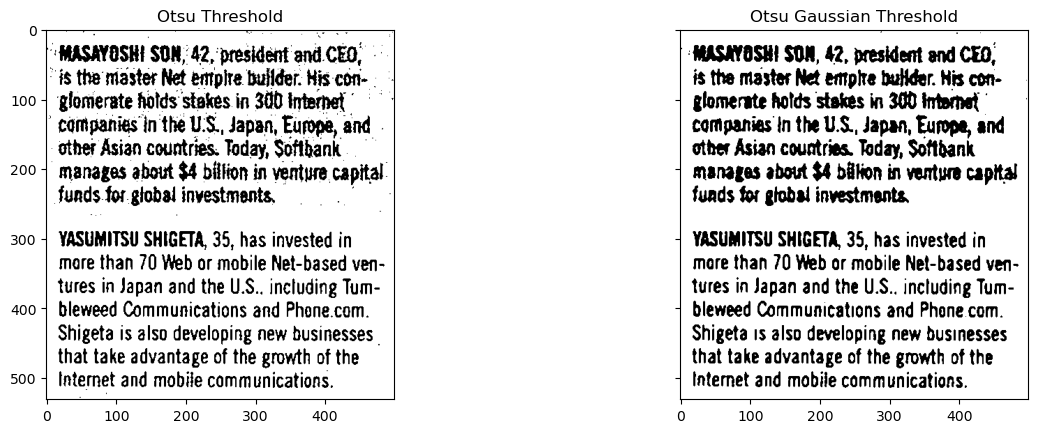

In [86]:
# Otsu's thresholding
ret2,otsu_threshold = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(median,(5,5),0)
ret3,otsu_gaussian_threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plot_image([otsu_threshold, otsu_gaussian_threshold], cmap='gray', captions = ["Otsu Threshold", "Otsu Gaussian Threshold"])
plt.show()

### Morphological transformations
Morphological transformations is normally performed on binary images. It needs two inputs, one is the image, other is structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation.

https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

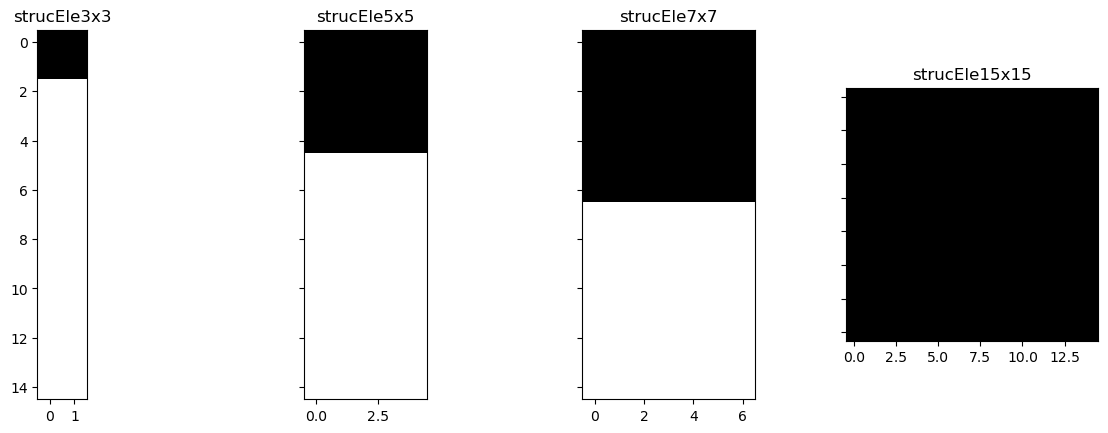

In [95]:
# Now, we define structuring elements

strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))        
strucEle15x15 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))

plot_image([strucEle3x3, strucEle5x5, strucEle7x7, strucEle15x15], cmap='gray', captions = ["strucEle3x3", "strucEle5x5", "strucEle7x7", "strucEle15x15"])
plt.show()

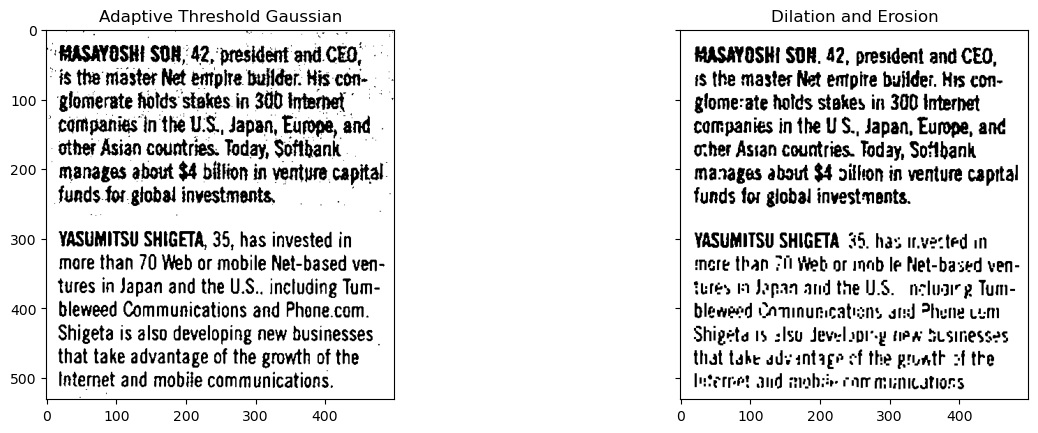

In [97]:
for i in range(2):
    imgThresh = cv2.dilate(adaptive_threshold_gaussian,strucEle3x3,iterations = 2)
    imgThresh = cv2.erode(imgThresh,strucEle3x3,iterations = 2)

plot_image([adaptive_threshold_gaussian, imgThresh], cmap='gray', captions = ["Adaptive Threshold Gaussian", "Dilation and Erosion"])            
plt.show()

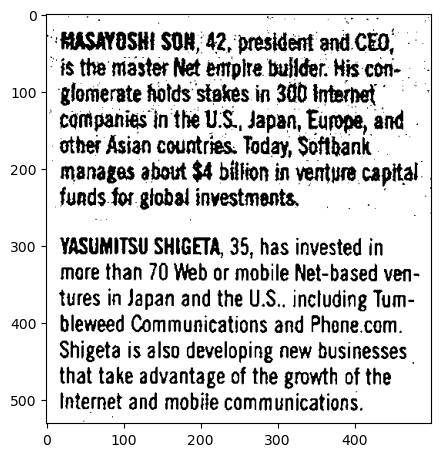

In [99]:
plotting(adaptive_threshold_gaussian, cmap = 'gray')

In [ ]:
text = pytesseract.image_to_string(imgThresh)

print(text)

#### If we perform more dilation and erosion, the characters will also detoriate. As you can see, because of dots, the result have deteroiated instead of improving, hence loop of 2 for morphological, however, as per need can be different, else we will loose text as well here

### Contours
Contours is an outline representing or bounding the shape or form of something. It is a curve joining all the continuous points (along the boundary), having same color or intensity. Here, we will identify the shape of the dots using contours and remove it. Once we find all the shapes/contours, we will identify the dots which will have shapes having areas less than certain number, aspect ratio etc. 

https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html

### Reverse the image
Generally, the object that we want to identify is in white and background is in black when using contours. So, revering the image to convert it in required format.

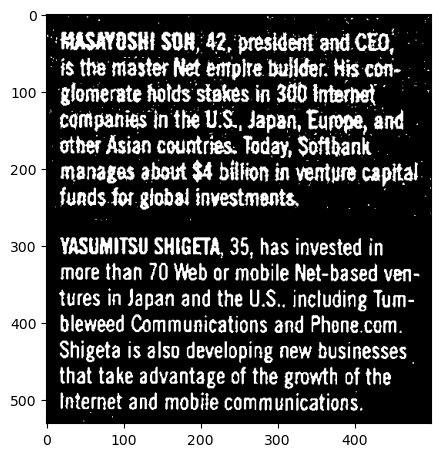

In [107]:
image_reverse = cv2.bitwise_not(adaptive_threshold_gaussian)
plotting(image_reverse, cmap = 'gray')

#### Function to draw and show contours

In [148]:
def drawAndShowContours(wd,ht,contours,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS
    
    # Defining a blank frame. Since it is initialised with zeros, it will be black
    blank_image = np.zeros((ht,wd), np.uint8)
    #cv2.drawContours(blank_image,contours,10,SCALAR_WHITE,-1)
    # Adding all possible contour to the blank frame 
    # Contour is white 
    cv2.drawContours(blank_image,contours,-1,SCALAR_WHITE,-1)
    
    #plt.imshow(blank_image, cmap = 'gray')
    # For better clarity, lets just view countour 9
    blank_image_contour_9 = np.zeros((ht,wd), np.uint8)

    # Let's just add contour 9th to the blank image and view it
    cv2.drawContours(blank_image_contour_9,contours,8,SCALAR_WHITE,-1)
    cv2.drawContours(blank_image_contour_9,contours,19,SCALAR_WHITE,-1)
    # Plotting
    plot_image([blank_image, blank_image_contour_9], cmap='gray', captions = ["All possible contours", "Only the 9th contour"])
    plt.show()
        
    return blank_image

#### Finding all the possible contours in image and showing the contours.

contours.shape: 660


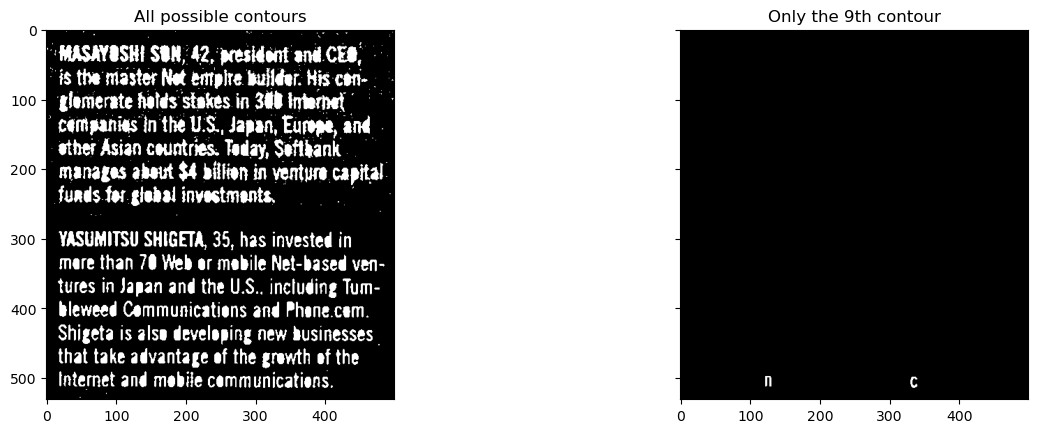

In [151]:
ht = np.size(image_reverse,0)
wd = np.size(image_reverse,1)

contours, hierarchy = cv2.findContours(image_reverse,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print ('contours.shape: ' + str(len(contours)))
im2 = drawAndShowContours(wd,ht,contours,'imgContours')

##### You can see that 660 contours have been identified and we are plotting just the 9the contour which is a dot. Now, we have to remove all such dots.

### Blob
Defining Blob class to store the properties of the contours such as centre of contour, aspect ratio, diagonal size etc.

In [153]:
class Blob:
    currentContour = [[0,0]]
    
    # First, let's define the 'Blob' function, which creates a 'Blob', with all the necessary parameters
    
    def Blob(self,_contour):
        self.currentContour = _contour
        self.currentBoundingRect = cv2.boundingRect(_contour) 

#### Function to plot the Blob

In [161]:
def drawAndShowBlobs(wd,ht,blobs,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS
    blank_image = np.zeros((ht,wd,3), np.uint8)
    
    contours=[]
    for blob in blobs:
        contours.append(blob.currentContour)
    #print("C is", contours)  
    contours.pop(0)
    #print("contours ", contours)
    cv2.drawContours(blank_image,contours,-1,SCALAR_WHITE,-1)
    

    plt.imshow(blank_image, cmap = 'gray')
    plt.show()
         
    return blank_image 

#### Finding the dots and then removing them

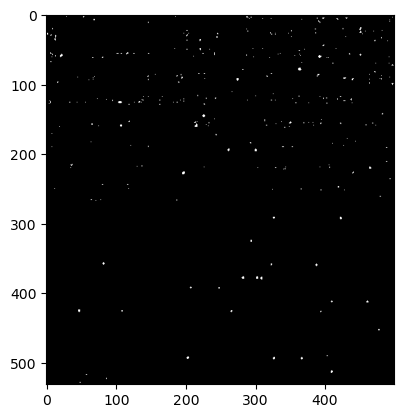

In [217]:
blob = Blob()
blobs = [blob]

area = 10

for contour in contours:
    # This is an instance of the class Blob()
    possiBlob = Blob()
    # This is the Blob function inside the class Blob()
    possiBlob.Blob(contour) # does it work? yes
    contourArea = cv2.contourArea(contour)
    if(contourArea < area):
        blobs.append(possiBlob)

# Now, using the hulls, we draw the blob objects.

dots = drawAndShowBlobs(wd,ht,blobs,'Blobs')

### Image after removing dots

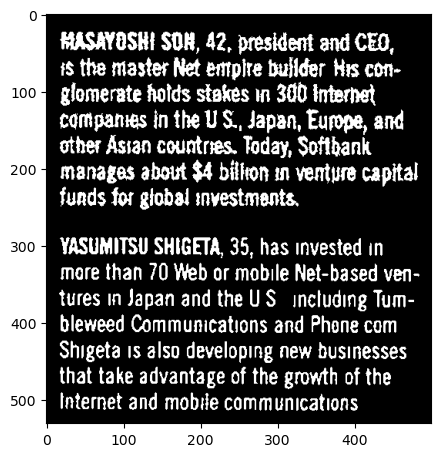

In [220]:
dots_ = cv2.cvtColor(dots, cv2.COLOR_BGR2GRAY)
imgDiff = cv2.absdiff(dots_, image_reverse)
plotting(imgDiff, cmap = 'gray')

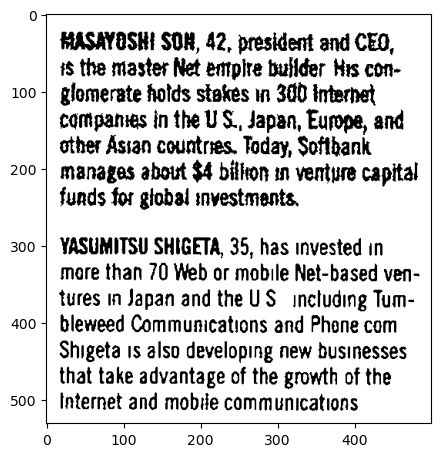

In [222]:
image_clean = cv2.bitwise_not(imgDiff)
plotting(image_clean, cmap = 'gray')

In [224]:
text = pytesseract.image_to_string(image_clean)

print(text)

FAASAYOSH! SOR, 42, president and CEO,

#8 the master Net empire builder His con-
glomerate holds stakes in 300 Internet
companies in the U S., Japan, Europe, and
other Asian countries. Today, Softbank
manages about $4 dillon in venture capital
funds for giobal investments,

YASUMITSU SHIGETA, 35, has invested in
mare than 70 Web or mobile Net-based ven-
tures in Japan and the US including Tum-
bleweed Communications and Phone com
Shigeta is also developing new businesses
that take advantage of the growth of the
Internet and mobile communications



### Another method
Let's use bilateral filter in the first stage itself and see the results. Sometimes the filters do not only dissolve the noise, but also smooth away the edges. To avoid this (at certain extent at least), we can use a bilateral filter.

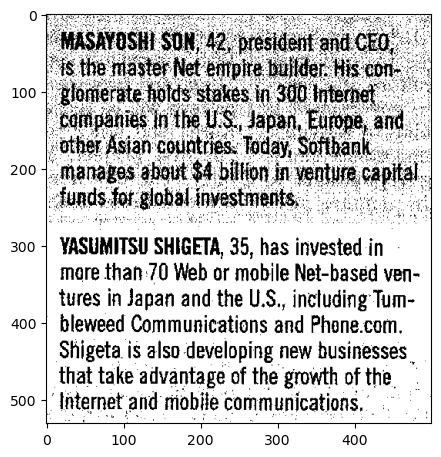

In [227]:
bilateral = cv2.bilateralFilter(gray,9,75,75)
#plotting
plotting(bilateral, cmap = 'gray')

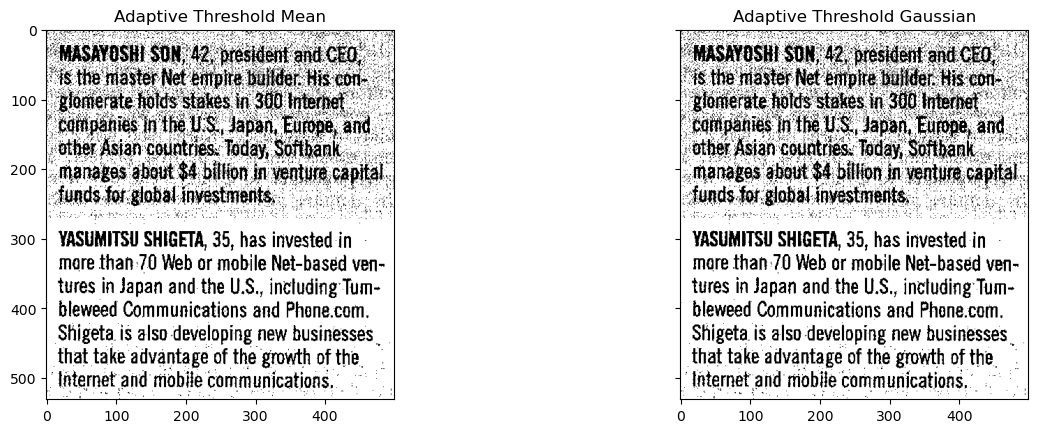

In [229]:
adaptive_threshold_mean = cv2.adaptiveThreshold(bilateral,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
adaptive_threshold_gaussian = cv2.adaptiveThreshold(bilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plot_image([adaptive_threshold_mean, adaptive_threshold_gaussian], cmap='gray', captions = ["Adaptive Threshold Mean", "Adaptive Threshold Gaussian"])
plt.show()

In [231]:
text = pytesseract.image_to_string(adaptive_threshold_gaussian)

print(text)

ages shout
a funds, for. global Anvest ments,

YASUMITSU SHIGETA, 35, has invested in
mare than:70 Web or mobile Net-baséd ven-
tures in Japan andthe U.S., including Tum-
bleweed Communications and Phone.com.
Shigeta is also developing new businesses
that take advantage of the growth of the.

: internet, and mtiobile communications,”



## These are the various methodologies for preprocessing image data, not everything is required and it depends on the image, however to understand each of the processes, have applied all to this image and noticed how pytesseract works after preprocessing